In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as mp

In [4]:
import matplotlib.pyplot as plt

In [5]:
fileLocation = "S:\CandleStickGeneratoer/TradeDetails.csv"

In [6]:
#tData = pd.read_csv("F:\jupyter_workspace\TradeDetails(CSV).csv")
tData = pd.read_csv(fileLocation) 

In [7]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   875 non-null    int64  
 1   Time         875 non-null    object 
 2   Session      875 non-null    object 
 3   Volume       875 non-null    int64  
 4   Price Entry  875 non-null    float64
 5   B/S          875 non-null    object 
 6   Profit       874 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 48.0+ KB


In [8]:
print(tData)

     Unnamed: 0                       Time            Session  Volume  \
0             0  2023-06-26 03:50:00-04:00  Overnight Session     929   
1             1  2023-06-26 04:25:00-04:00  Overnight Session     575   
2             2  2023-06-26 04:30:00-04:00  Overnight Session    1467   
3             3  2023-06-26 04:45:00-04:00  Overnight Session     963   
4             4  2023-06-26 05:00:00-04:00  Overnight Session     570   
..          ...                        ...                ...     ...   
870         870  2023-08-24 09:05:00-04:00         Pre-Market    1773   
871         871  2023-08-24 09:30:00-04:00        RTH Session   32104   
872         872  2023-08-24 11:25:00-04:00          RTH Lunch    7702   
873         873  2023-08-24 14:40:00-04:00          RTH Lunch    6395   
874         874  2023-08-24 16:50:00-04:00      After-Session     661   

     Price Entry   B/S  Profit  
0       15046.25   Buy  -585.0  
1       15017.00  Sell  -160.0  
2       15025.00   Buy  

In [9]:
tData.replace('Null', None)

,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,0,2023-06-26 03:50:00-04:00,Overnight Session,929,15046.25,Buy,-585.0
1,1,2023-06-26 04:25:00-04:00,Overnight Session,575,15017.00,Sell,-160.0
2,2,2023-06-26 04:30:00-04:00,Overnight Session,1467,15025.00,Buy,-395.0
3,3,2023-06-26 04:45:00-04:00,Overnight Session,963,15005.25,Sell,-195.0
4,4,2023-06-26 05:00:00-04:00,Overnight Session,570,15015.00,Buy,60.0
...,...,...,...,...,...,...,...
870,870,2023-08-24 09:05:00-04:00,Pre-Market,1773,15343.25,Buy,-1745.0
871,871,2023-08-24 09:30:00-04:00,RTH Session,32104,15256.00,Sell,4760.0
872,872,2023-08-24 11:25:00-04:00,RTH Lunch,7702,15018.00,Buy,-1570.0
873,873,2023-08-24 14:40:00-04:00,RTH Lunch,6395,14939.50,Sell,2160.0


In [10]:
#type(tData['Profit'][947])

In [11]:
type(tData)

pandas.core.frame.DataFrame

In [12]:
#if tData['Profit'][947] is None:
#    print("it is None")
#else:
#    print("not none")

In [13]:
#tData = pd.read_csv("F:\jupyter_workspace\TradeDetails(CSV).csv", na_values = "Null")
tData = pd.read_csv(fileLocation, na_values = "Null")


In [14]:
#type(tData['Profit'][947])

In [15]:
tData.isnull().any()

Unnamed: 0     False
Time           False
Session        False
Volume         False
Price Entry    False
B/S            False
Profit          True
dtype: bool

In [16]:
tData[tData['Profit'].isnull()].index.tolist()

[874]

In [17]:
tData.dropna()

,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,0,2023-06-26 03:50:00-04:00,Overnight Session,929,15046.25,Buy,-585.0
1,1,2023-06-26 04:25:00-04:00,Overnight Session,575,15017.00,Sell,-160.0
2,2,2023-06-26 04:30:00-04:00,Overnight Session,1467,15025.00,Buy,-395.0
3,3,2023-06-26 04:45:00-04:00,Overnight Session,963,15005.25,Sell,-195.0
4,4,2023-06-26 05:00:00-04:00,Overnight Session,570,15015.00,Buy,60.0
...,...,...,...,...,...,...,...
869,869,2023-08-24 07:40:00-04:00,Overnight Session,1122,15368.50,Sell,505.0
870,870,2023-08-24 09:05:00-04:00,Pre-Market,1773,15343.25,Buy,-1745.0
871,871,2023-08-24 09:30:00-04:00,RTH Session,32104,15256.00,Sell,4760.0
872,872,2023-08-24 11:25:00-04:00,RTH Lunch,7702,15018.00,Buy,-1570.0


## Discovered that the pandas interpreter of the CSV file needs to identify what values should be NaN/Null, then all we had to do was remove the row with bad values

##

### Now we begin the process to sort and filter our data set

In [18]:
os = tData[tData['Session'].str.contains("Overnight Session")].copy()

In [19]:
os

,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,0,2023-06-26 03:50:00-04:00,Overnight Session,929,15046.25,Buy,-585.0
1,1,2023-06-26 04:25:00-04:00,Overnight Session,575,15017.00,Sell,-160.0
2,2,2023-06-26 04:30:00-04:00,Overnight Session,1467,15025.00,Buy,-395.0
3,3,2023-06-26 04:45:00-04:00,Overnight Session,963,15005.25,Sell,-195.0
4,4,2023-06-26 05:00:00-04:00,Overnight Session,570,15015.00,Buy,60.0
...,...,...,...,...,...,...,...
865,865,2023-08-24 03:30:00-04:00,Overnight Session,1427,15388.00,Sell,-460.0
866,866,2023-08-24 04:00:00-04:00,Overnight Session,2241,15411.00,Buy,-560.0
867,867,2023-08-24 04:35:00-04:00,Overnight Session,826,15383.00,Sell,295.0
868,868,2023-08-24 06:05:00-04:00,Overnight Session,724,15368.25,Buy,5.0


In [20]:
os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 869
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   393 non-null    int64  
 1   Time         393 non-null    object 
 2   Session      393 non-null    object 
 3   Volume       393 non-null    int64  
 4   Price Entry  393 non-null    float64
 5   B/S          393 non-null    object 
 6   Profit       393 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 24.6+ KB


In [21]:
os.isnull().any()

Unnamed: 0     False
Time           False
Session        False
Volume         False
Price Entry    False
B/S            False
Profit         False
dtype: bool

In [22]:
os = pd.DataFrame(os).reset_index()
#not sure if this is necessary or if this is going to ruin stuff later

In [23]:
os

,index,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,0,0,2023-06-26 03:50:00-04:00,Overnight Session,929,15046.25,Buy,-585.0
1,1,1,2023-06-26 04:25:00-04:00,Overnight Session,575,15017.00,Sell,-160.0
2,2,2,2023-06-26 04:30:00-04:00,Overnight Session,1467,15025.00,Buy,-395.0
3,3,3,2023-06-26 04:45:00-04:00,Overnight Session,963,15005.25,Sell,-195.0
4,4,4,2023-06-26 05:00:00-04:00,Overnight Session,570,15015.00,Buy,60.0
...,...,...,...,...,...,...,...,...
388,865,865,2023-08-24 03:30:00-04:00,Overnight Session,1427,15388.00,Sell,-460.0
389,866,866,2023-08-24 04:00:00-04:00,Overnight Session,2241,15411.00,Buy,-560.0
390,867,867,2023-08-24 04:35:00-04:00,Overnight Session,826,15383.00,Sell,295.0
391,868,868,2023-08-24 06:05:00-04:00,Overnight Session,724,15368.25,Buy,5.0


In [24]:
rs = tData[tData['Session'].str.contains("RTH Session")].copy()
rs = pd.DataFrame(rs).reset_index()
rs

,index,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,8,8,2023-06-26 09:35:00-04:00,RTH Session,11031,15075.75,Buy,250.0
1,9,9,2023-06-26 10:30:00-04:00,RTH Session,10814,15088.25,Sell,3620.0
2,27,27,2023-06-27 10:10:00-04:00,RTH Session,12794,14909.75,Sell,-765.0
3,42,42,2023-06-28 09:30:00-04:00,RTH Session,19842,15065.00,Buy,1270.0
4,64,64,2023-06-29 10:55:00-04:00,RTH Session,5900,15069.25,Buy,405.0
...,...,...,...,...,...,...,...,...
61,752,752,2023-08-16 09:35:00-04:00,RTH Session,16786,15096.25,Buy,210.0
62,814,814,2023-08-21 09:35:00-04:00,RTH Session,17522,14876.75,Buy,-925.0
63,815,815,2023-08-21 10:25:00-04:00,RTH Session,12949,14830.50,Sell,-105.0
64,830,830,2023-08-22 10:50:00-04:00,RTH Session,6813,15037.50,Buy,-1185.0


In [25]:
pm = tData[tData['Session'].str.contains("Pre-Market")].copy()
pm = pd.DataFrame(pm).reset_index()
pm

,index,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,7,7,2023-06-26 09:05:00-04:00,Pre-Market,1031,15046.75,Sell,-580.0
1,26,26,2023-06-27 08:30:00-04:00,Pre-Market,2157,14919.50,Buy,-195.0
2,78,78,2023-06-30 08:05:00-04:00,Pre-Market,808,15182.50,Buy,3030.0
3,104,104,2023-07-05 08:40:00-04:00,Pre-Market,969,15276.75,Buy,2420.0
4,146,146,2023-07-07 08:25:00-04:00,Pre-Market,980,15226.00,Buy,-400.0
5,147,147,2023-07-07 09:00:00-04:00,Pre-Market,6609,15206.00,Sell,-845.0
6,161,161,2023-07-10 08:30:00-04:00,Pre-Market,1289,15172.75,Sell,-570.0
7,187,187,2023-07-11 08:15:00-04:00,Pre-Market,1490,15215.50,Sell,-445.0
8,188,188,2023-07-11 08:30:00-04:00,Pre-Market,1698,15237.75,Buy,-295.0
9,189,189,2023-07-11 08:45:00-04:00,Pre-Market,1183,15223.00,Sell,945.0


In [26]:
rl = tData[tData['Session'].str.contains("RTH Lunch")].copy()
rl = pd.DataFrame(rl).reset_index()
rl

,index,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,10,10,2023-06-26 13:05:00-04:00,RTH Lunch,3520,14907.25,Buy,-115.0
1,28,28,2023-06-27 11:20:00-04:00,RTH Lunch,6302,14948.00,Buy,2020.0
2,29,29,2023-06-27 13:10:00-04:00,RTH Lunch,3101,15049.00,Sell,-650.0
3,30,30,2023-06-27 13:20:00-04:00,RTH Lunch,6005,15081.50,Buy,865.0
4,31,31,2023-06-27 14:25:00-04:00,RTH Lunch,3082,15124.75,Sell,1400.0
...,...,...,...,...,...,...,...,...
161,849,849,2023-08-23 11:30:00-04:00,RTH Lunch,4299,15183.00,Sell,-765.0
162,850,850,2023-08-23 13:25:00-04:00,RTH Lunch,2884,15221.25,Buy,40.0
163,851,851,2023-08-23 14:05:00-04:00,RTH Lunch,2757,15223.25,Sell,45.0
164,872,872,2023-08-24 11:25:00-04:00,RTH Lunch,7702,15018.00,Buy,-1570.0


In [27]:
rp = tData[tData['Session'].str.contains("RTH Power Hour")].copy()
rp = pd.DataFrame(rp).reset_index()
rp

,index,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,11,11,2023-06-26 15:40:00-04:00,RTH Power Hour,6135,14901.50,Sell,575.0
1,47,47,2023-06-28 15:00:00-04:00,RTH Power Hour,5664,15092.75,Sell,-925.0
2,48,48,2023-06-28 15:55:00-04:00,RTH Power Hour,15304,15139.00,Buy,440.0
3,84,84,2023-06-30 15:35:00-04:00,RTH Power Hour,4501,15363.50,Buy,-260.0
4,85,85,2023-06-30 15:45:00-04:00,RTH Power Hour,4636,15350.50,Sell,-320.0
5,86,86,2023-06-30 15:50:00-04:00,RTH Power Hour,9628,15366.50,Buy,-705.0
6,87,87,2023-06-30 15:55:00-04:00,RTH Power Hour,21013,15331.25,Sell,-505.0
7,109,109,2023-07-05 15:50:00-04:00,RTH Power Hour,5479,15365.25,Sell,210.0
8,131,131,2023-07-06 15:10:00-04:00,RTH Power Hour,3522,15229.75,Sell,70.0
9,171,171,2023-07-10 15:10:00-04:00,RTH Power Hour,2350,15169.00,Sell,-695.0


In [28]:
afs = tData[tData['Session'].str.contains("After-Session")].copy()
afs = pd.DataFrame(afs).reset_index()
afs

,index,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,12,12,2023-06-26 16:55:00-04:00,After-Session,441,14872.75,Buy,190.0
1,152,152,2023-07-07 16:40:00-04:00,After-Session,345,15193.50,Buy,-585.0
2,172,172,2023-07-10 16:00:00-04:00,After-Session,6569,15203.75,Buy,-135.0
3,173,173,2023-07-10 16:50:00-04:00,After-Session,287,15197.00,Sell,95.0
4,197,197,2023-07-11 16:45:00-04:00,After-Session,437,15262.00,Sell,-90.0
5,216,216,2023-07-12 16:20:00-04:00,After-Session,531,15463.75,Buy,-110.0
6,217,217,2023-07-12 16:45:00-04:00,After-Session,385,15458.25,Sell,-185.0
7,378,378,2023-07-21 16:00:00-04:00,After-Session,8732,15549.00,Buy,-55.0
8,404,404,2023-07-24 16:00:00-04:00,After-Session,5897,15573.25,Buy,-215.0
9,428,428,2023-07-25 16:20:00-04:00,After-Session,1853,15720.75,Buy,-1160.0


In [29]:
aas = tData[tData['Session'].str.contains("Asia Session")].copy()
aas = pd.DataFrame(aas).reset_index()
aas

,index,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit
0,13,13,2023-06-26 20:25:00-04:00,Asia Session,164,14882.25,Sell,-60.0
1,14,14,2023-06-26 21:45:00-04:00,Asia Session,514,14885.25,Buy,-45.0
2,32,32,2023-06-27 19:35:00-04:00,Asia Session,894,15054.75,Buy,-280.0
3,33,33,2023-06-27 20:35:00-04:00,Asia Session,449,15040.75,Sell,-130.0
4,34,34,2023-06-27 21:00:00-04:00,Asia Session,312,15047.25,Buy,315.0
...,...,...,...,...,...,...,...,...
117,824,824,2023-08-21 21:20:00-04:00,Asia Session,495,14961.25,Buy,250.0
118,837,837,2023-08-22 18:55:00-04:00,Asia Session,69,14970.50,Sell,-190.0
119,838,838,2023-08-22 20:10:00-04:00,Asia Session,426,14980.00,Buy,785.0
120,855,855,2023-08-23 18:20:00-04:00,Asia Session,1397,15298.75,Sell,-1235.0


os = overnight session

rs = rth session 

pm = pre market session 

rl = rth lunch session 

rp = rth power session 

afs = after market session 

aas = asia session


([<matplotlib.patches.Wedge at 0x20cb7e24b90>,
 [Text(-1.086270985072353, 0.17324937803622767, 'Overnight Session'),
  Text(-0.08689622402321513, -1.0965623768169814, 'RTH Session'),
  Text(0.386935376969594, -1.0296994775415778, 'Pre-Market Session'),
  Text(1.0073506734735889, -0.4418649348526167, 'RTH Lunch Session'),
  Text(1.0296994820700156, 0.3869353649186667, 'RTH Power Session'),
  Text(0.8986668676248828, 0.6343483751325305, 'After-Market Session'),
  Text(0.46706884968920304, 0.9959150012174758, 'Asia Session')],
 [Text(-0.5925114464031016, 0.09449966074703327, '393'),
  Text(-0.04739794037629916, -0.5981249328092625, '66'),
  Text(0.21105566016523308, -0.5616542604772242, '56'),
  Text(0.5494640037128666, -0.24101723719233634, '166'),
  Text(0.5616542629472812, 0.211055653592, '49'),
  Text(0.49018192779539055, 0.34600820461774384, '22'),
  Text(0.25476482710320164, 0.5432263643004412, '122')])

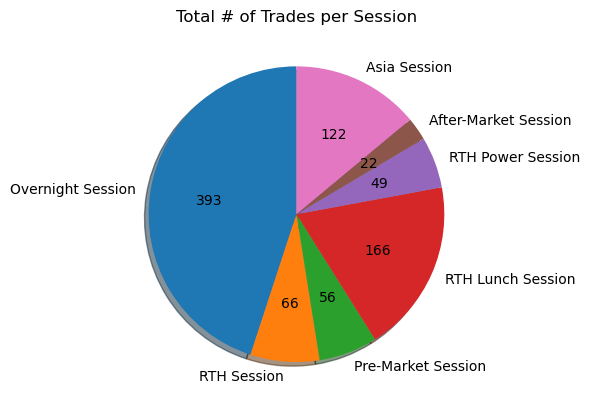

In [30]:
pieData = pd.DataFrame({
    'Sessions': ['Overnight Session', 'RTH Session', 'Pre-Market Session', 'RTH Lunch Session', 'RTH Power Session', 'After-Market Session', 'Asia Session'],
    'numOfSessions': [os['Profit'].count(), rs['Profit'].count(), pm['Profit'].count(), rl['Profit'].count(), rp['Profit'].count(), afs['Profit'].count(), aas['Profit'].count()]
})
plt.title('Total # of Trades per Session')
plt.pie(pieData['numOfSessions'], labels = pieData['Sessions'], shadow = True, startangle = 90,
       autopct = lambda p: '{:.0f}'.format(p*((tData['Profit'].count())/100)),
       )

In [31]:
#pieData.plot.bar(x='Sessions', y='numOfSessions')

<Axes: title={'center': 'Median Trade Result per Session'}, xlabel='Session', ylabel='Price'>

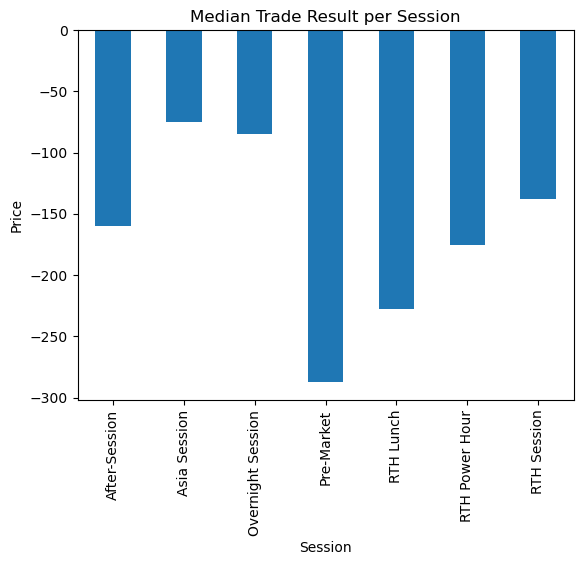

In [32]:
#tData.info()
tData.groupby('Session')['Profit'].median().plot.bar(title = 'Median Trade Result per Session', ylabel = 'Price')

<Axes: title={'center': 'Average Trade Result per Session'}, xlabel='Session', ylabel='Price'>

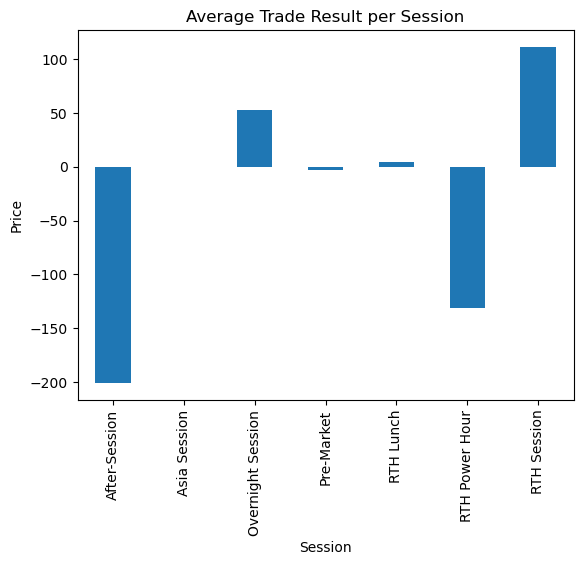

In [33]:
tData.groupby('Session')['Profit'].mean().plot.bar(title = 'Average Trade Result per Session', ylabel = 'Price')

<Axes: title={'center': 'Total PnL per Session'}, xlabel='Session', ylabel='Profit'>

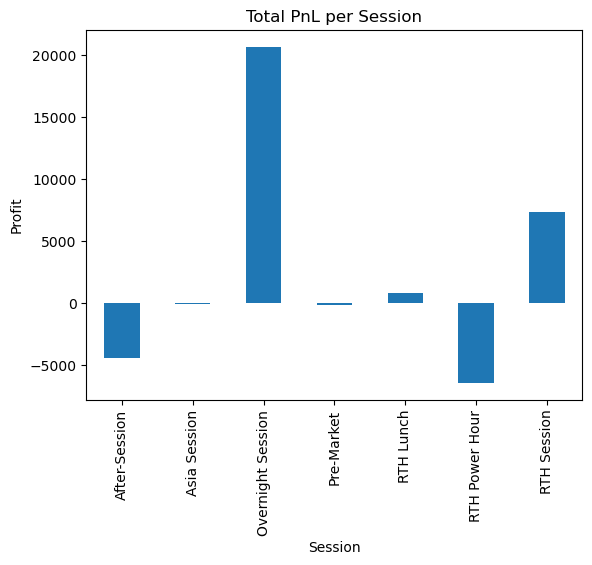

In [34]:
tData.groupby('Session')['Profit'].sum().plot.bar(title = 'Total PnL per Session', ylabel = 'Profit')

<Axes: title={'center': 'Median Transaction Size per Session'}, xlabel='Session', ylabel='Price'>

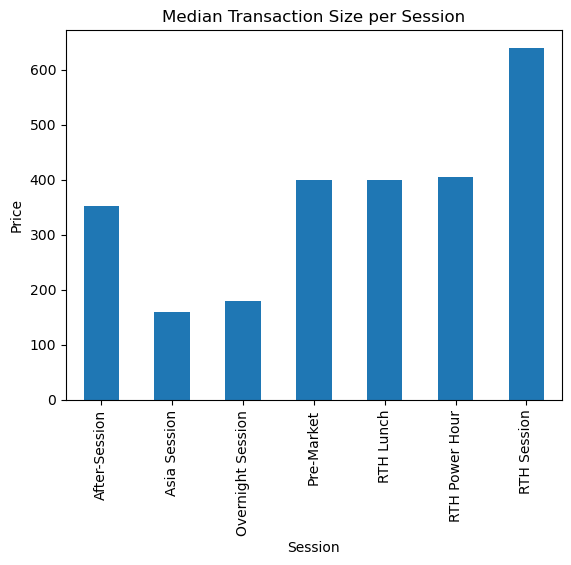

In [35]:
tData['Tradesize'] = tData['Profit'].abs()
tData.groupby('Session')['Tradesize'].median().plot.bar(title = 'Median Transaction Size per Session', ylabel = 'Price')

### It's clear that the most transacted amount of money is occuring during the RTH Session, this is intuitive since that is the session with the most amount of volatility, which is often correlated with opportunities.

In [36]:
#For the next graph, filter and get rid of positive values, generate a pie chart to show number of winning trades percent
#and a pie chart for losing trades per session and then percentage of winning and losing trades per session

In [37]:
#Forgot to apply filterData filter, and regardless the graph is not needed.
#filterData = tData['Profit'] > 0
#tData.groupby('Session')['Tradesize'].count().plot.bar(title = 'Number of Winning Trades Per Session', ylabel = 'Trade Count')

In [38]:
#filterData = tData['Profit'] > 0
#tData[filterData].groupby('Session')['Profit'].count().plot.pie(title = "Number of Winning Trades per Session", 
#                                                  autopct= lambda x: '{:.3f}'.format((x * (tData[filterData]['Volume'].count()) / 100) ))

In [39]:
filterData = tData['Profit'] > 0
filteredProfits = tData[filterData].groupby('Session')['Volume'].count()
profitCount = tData.groupby('Session')['Volume'].count()
print(filteredProfits)
print(profitCount)


Session
After-Session          7
Asia Session          47
Overnight Session    143
Pre-Market            15
RTH Lunch             54
RTH Power Hour        16
RTH Session           27
Name: Volume, dtype: int64
Session
After-Session         23
Asia Session         122
Overnight Session    393
Pre-Market            56
RTH Lunch            166
RTH Power Hour        49
RTH Session           66
Name: Volume, dtype: int64


<Axes: title={'center': 'Winning Trade % per Session'}, xlabel='Session', ylabel='Percent (%)'>

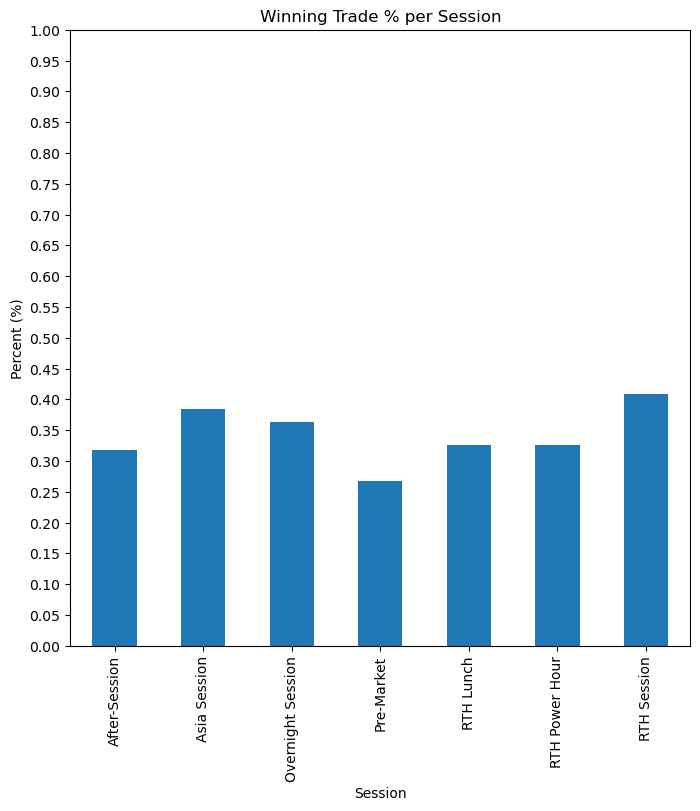

In [40]:
filterData = tData['Profit'] > 0
(
(tData[filterData].groupby('Session')['Profit'].count()) / 
(tData.groupby('Session')['Profit'].count())
).plot.bar(
    title = "Winning Trade % per Session",
    ylim = (0,1),
    figsize=(8,8),
    yticks = (np.arange(0,1.05,0.05)),
    ylabel = 'Percent (%)'
)

In [41]:
baseWinMean = tData[filterData].groupby('Session')['Profit'].median()
baseWinMean

Session
After-Session        190.0
Asia Session         220.0
Overnight Session    275.0
Pre-Market           945.0
RTH Lunch            457.5
RTH Power Hour       485.0
RTH Session          690.0
Name: Profit, dtype: float64

In [42]:
filterData = tData['Profit'] < 0
baseLossMean = tData[filterData].groupby('Session')['Profit'].median()
baseLossMean

Session
After-Session       -395.0
Asia Session        -155.0
Overnight Session   -160.0
Pre-Market          -355.0
RTH Lunch           -380.0
RTH Power Hour      -390.0
RTH Session         -570.0
Name: Profit, dtype: float64

### The cell above was updated after analysis, accidently mismatched median and mean when calculating the ratio, but I will not correct it since the numbers are bery similar regardless. Future note: be more thorough when checking over work.

In [43]:
filterData = tData['Profit'] > 0 
baseWinPercentage = (tData[filterData].groupby('Session')['Profit'].count()) / (tData.groupby('Session')['Profit'].count())
baseWinPercentage

Session
After-Session        0.318182
Asia Session         0.385246
Overnight Session    0.363868
Pre-Market           0.267857
RTH Lunch            0.325301
RTH Power Hour       0.326531
RTH Session          0.409091
Name: Profit, dtype: float64

# ---------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------

In [44]:
#compare the github repo with the analysis here 
#add volume comparison (filter so that above avg vol and below avg vol are considered)
#Transform data set to see if a hard set brackets would benefit the strat (test with brackets and test with letting winners run)

#^^^ keep in mind this will not be a perfect representation as brackets need to be implemented when gathering the data in the 
#first place

# ---------------------------------------------------------------------------------------------------------------
### Lets try to find someway to make the strategy more effective. The most common thing to do when you have a trading strategy is to add rules, some would say it is apart of the strategy. In this case, we can add two rules:
### Take trades under only high/suffecient volume conditions
### Take trades with a set stop loss 

### These two methods are the most common amongst traders, especially the stop loss rule. Its a numbers game, if I win more than I lose, even if I win half the time I will still make money. The stop loss will allow us to maintain a strict loss amount, which will improve our avg win loss ratio. And the volume parameter will give us more opportunity, since the more volatile the market is, the more opportunities we will most likely have. But just out of curiosity, we will investigate trades made above median volume and below median volume.
# ---------------------------------------------------------------------------------------------------------------

In [45]:
tData['BracketNoTP'] = np.where((tData['Profit'] <= -300), -300, tData['Profit'])
tData['BracketNoTP'].isna().sum()

1

In [46]:
tData.isnull()
#type(tData['BracketNoTP'][947])
tData.dropna()

,Unnamed: 0,Time,Session,Volume,Price Entry,B/S,Profit,Tradesize,BracketNoTP
0,0,2023-06-26 03:50:00-04:00,Overnight Session,929,15046.25,Buy,-585.0,585.0,-300.0
1,1,2023-06-26 04:25:00-04:00,Overnight Session,575,15017.00,Sell,-160.0,160.0,-160.0
2,2,2023-06-26 04:30:00-04:00,Overnight Session,1467,15025.00,Buy,-395.0,395.0,-300.0
3,3,2023-06-26 04:45:00-04:00,Overnight Session,963,15005.25,Sell,-195.0,195.0,-195.0
4,4,2023-06-26 05:00:00-04:00,Overnight Session,570,15015.00,Buy,60.0,60.0,60.0
...,...,...,...,...,...,...,...,...,...
869,869,2023-08-24 07:40:00-04:00,Overnight Session,1122,15368.50,Sell,505.0,505.0,505.0
870,870,2023-08-24 09:05:00-04:00,Pre-Market,1773,15343.25,Buy,-1745.0,1745.0,-300.0
871,871,2023-08-24 09:30:00-04:00,RTH Session,32104,15256.00,Sell,4760.0,4760.0,4760.0
872,872,2023-08-24 11:25:00-04:00,RTH Lunch,7702,15018.00,Buy,-1570.0,1570.0,-300.0


<Axes: title={'center': 'Total PnL per Session With Stop Loss'}, xlabel='Session', ylabel='Profit'>

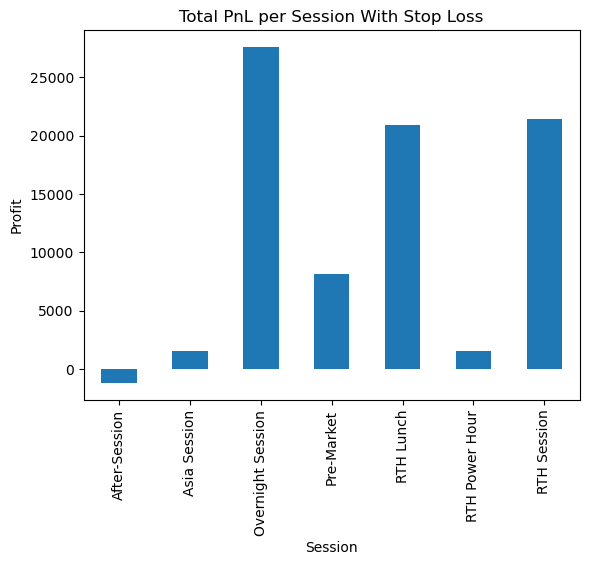

In [47]:
tData.groupby('Session')['BracketNoTP'].sum().plot.bar(title = 'Total PnL per Session With Stop Loss', ylabel = 'Profit')

### Lets see the difference between when we have a stop loss and when we don't.

<Axes: title={'center': 'Difference In Profit With SL'}, xlabel='Session', ylabel='Profit Difference'>

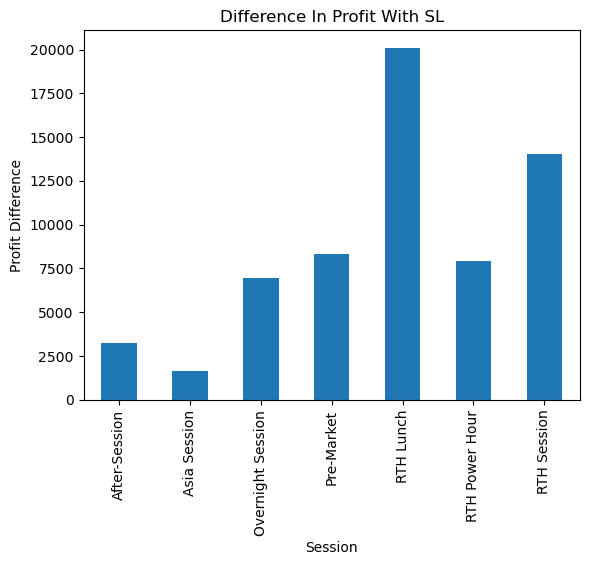

In [48]:
 ((tData.groupby('Session')['BracketNoTP'].sum()) - (tData.groupby('Session')['Profit'].sum())).plot.bar(title = 
                                                                    'Difference In Profit With SL', ylabel = 'Profit Difference')

In [49]:
tData['numOfTradeStopped'] = np.where(tData['Profit'] <= -300, 1, 0)
tData['numOfTradeStopped'].sum()

222

### The RTH Session saved almost 15k by adding the stop loss in 197 trades, thats about saving 75 dollars per trade. A very drastic improvement. 
### Infact, 3 additional sessions were positive in PnL, making this rule very effective in supporting the MACD strategy. 

In [50]:
#add volume comparison (filter so that above avg vol and below avg vol are considered) on top of the bracket

#^^^ keep in mind this will not be a perfect representation as brackets need to be implemented when gathering the data in the 
#first place

In [51]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         875 non-null    int64  
 1   Time               875 non-null    object 
 2   Session            875 non-null    object 
 3   Volume             875 non-null    int64  
 4   Price Entry        875 non-null    float64
 5   B/S                875 non-null    object 
 6   Profit             874 non-null    float64
 7   Tradesize          874 non-null    float64
 8   BracketNoTP        874 non-null    float64
 9   numOfTradeStopped  875 non-null    int32  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 65.1+ KB


In [52]:
import scipy.stats as stats

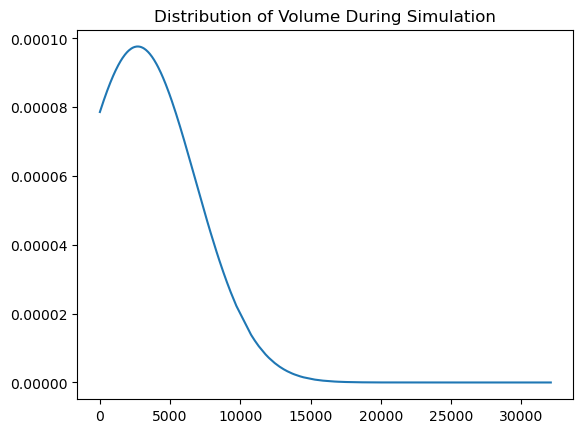

In [53]:
tData_meanSL = np.mean(tData['Volume'])
tData_stdSL = np.std(tData['Volume'])


pdf = stats.norm.pdf(tData['Volume'].sort_values(), tData_meanSL, tData_stdSL)


plt.plot(tData['Volume'].sort_values(), pdf)
plt.title('Distribution of Volume During Simulation')
plt.show()

#plt.xlim([-3000,7000])
#plt.ylim([-100,100])

In [54]:
aVolFilter = tData['Volume'] > np.median(tData['Volume'])
bVolFilter = tData['Volume'] < np.median(tData['Volume'])
pProfitFilter = tData['Profit'] > 0
nProfitFilter = tData['Profit'] < 0

<Axes: title={'center': 'Difference in Profit w & w/o aVol. Filter'}, xlabel='Session', ylabel='Profit Difference'>

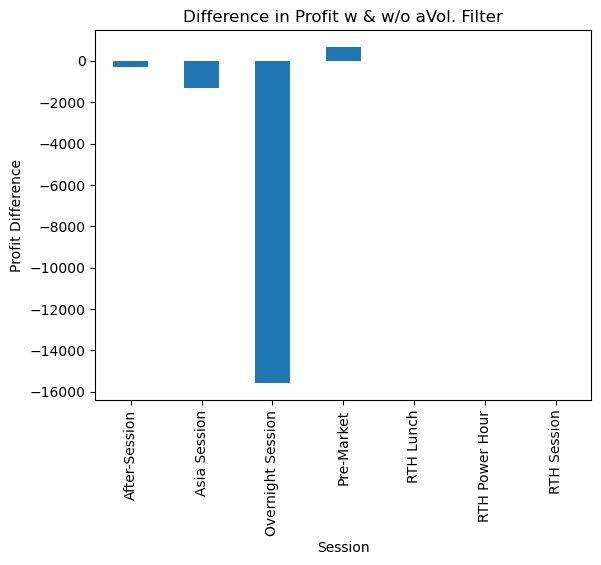

In [55]:
(tData[aVolFilter].groupby('Session')['BracketNoTP'].sum() - tData.groupby('Session')['BracketNoTP'].sum()).plot.bar(title = 'Difference in Profit w & w/o aVol. Filter', ylabel = 'Profit Difference')

<Axes: title={'center': 'Difference in Profit w & w/o bVol. Filter'}, xlabel='Session', ylabel='Profit Difference'>

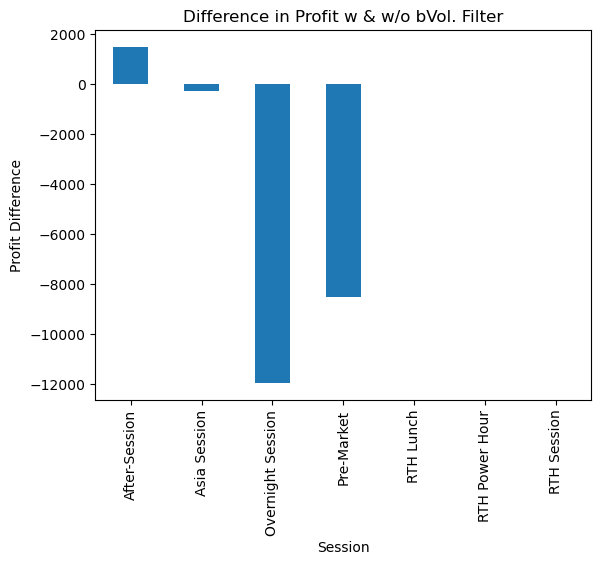

In [56]:
(tData[bVolFilter].groupby('Session')['BracketNoTP'].sum() - tData.groupby('Session')['BracketNoTP'].sum()).plot.bar(title = 'Difference in Profit w & w/o bVol. Filter', ylabel = 'Profit Difference')

In [57]:
#see mean and median instead of sum and try to draw conclusion

In [58]:
print('Difference between aVol filter and regular trade results')
(tData[aVolFilter].groupby('Session')['BracketNoTP'].median() - tData.groupby('Session')['BracketNoTP'].median())

Difference between aVol filter and regular trade results


Session
After-Session       -97.5
Asia Session        -70.0
Overnight Session   -25.0
Pre-Market           -2.5
RTH Lunch             0.0
RTH Power Hour        0.0
RTH Session           0.0
Name: BracketNoTP, dtype: float64

### The reason we wont stop at comparing the median with both winning and losing trades is because since the sum is greater than without the volume filter, we need to find out why.

In [59]:
print('Difference between bVol filter and regular trade results')
(tData[bVolFilter].groupby('Session')['BracketNoTP'].median() - tData.groupby('Session')['BracketNoTP'].median())

Difference between bVol filter and regular trade results


Session
After-Session        60.0
Asia Session          5.0
Overnight Session     0.0
Pre-Market            2.5
RTH Lunch             NaN
RTH Power Hour        NaN
RTH Session           NaN
Name: BracketNoTP, dtype: float64

### So interestingly, the median trade improved for bVolume and decreased for aVol, while total profit decreased for bVol and increased for aVol

In [60]:
#tData[aVolFilter][pProfitFilter].groupby('Session')['BracketNoTP'].median()
print('Difference in winning trades with the aVol filter and without')
(tData[aVolFilter][pProfitFilter].groupby('Session')['BracketNoTP'].median() - 
tData[pProfitFilter].groupby('Session')['BracketNoTP'].median())

Difference in winning trades with the aVol filter and without


C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_49920\2049665028.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (tData[aVolFilter][pProfitFilter].groupby('Session')['BracketNoTP'].median() -


Session
After-Session        15.0
Asia Session         40.0
Overnight Session    77.5
Pre-Market           30.0
RTH Lunch             0.0
RTH Power Hour        0.0
RTH Session           0.0
Name: BracketNoTP, dtype: float64

In [61]:
print('Difference in winning trades with the bVol filter and without')
(tData[bVolFilter][pProfitFilter].groupby('Session')['BracketNoTP'].median() - 
tData[pProfitFilter].groupby('Session')['BracketNoTP'].median())

Difference in winning trades with the bVol filter and without


C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_49920\780491782.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (tData[bVolFilter][pProfitFilter].groupby('Session')['BracketNoTP'].median() -


Session
After-Session          0.0
Asia Session           0.0
Overnight Session    -60.0
Pre-Market          -415.0
RTH Lunch              NaN
RTH Power Hour         NaN
RTH Session            NaN
Name: BracketNoTP, dtype: float64

In [62]:
#large vol filter with profits show little change in winning trades 
#small vol filter with profits show little change as well, except in the RTH Session.

In [63]:
print('Difference in losing trades with the aVol filter and without')
(tData[aVolFilter][nProfitFilter].groupby('Session')['BracketNoTP'].median() - 
tData[nProfitFilter].groupby('Session')['BracketNoTP'].median())

Difference in losing trades with the aVol filter and without


C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_49920\236088620.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (tData[aVolFilter][nProfitFilter].groupby('Session')['BracketNoTP'].median() -


Session
After-Session          0.0
Asia Session        -125.0
Overnight Session    -65.0
Pre-Market             0.0
RTH Lunch              0.0
RTH Power Hour         0.0
RTH Session            0.0
Name: BracketNoTP, dtype: float64

In [64]:
print('Difference in losing trades with the bVol filter and without')
(tData[bVolFilter][nProfitFilter].groupby('Session')['BracketNoTP'].median() - 
tData[nProfitFilter].groupby('Session')['BracketNoTP'].median())

Difference in losing trades with the bVol filter and without


C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_49920\1147424458.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (tData[bVolFilter][nProfitFilter].groupby('Session')['BracketNoTP'].median() -


Session
After-Session         0.0
Asia Session         25.0
Overnight Session    12.5
Pre-Market           10.0
RTH Lunch             NaN
RTH Power Hour        NaN
RTH Session           NaN
Name: BracketNoTP, dtype: float64

### Again little change in both cases, implying that if the median is not the driving factor in the differences of total PnL then the larger trades that are outliers are what seem to be affecting the sum result. We can test this in the following test

### When we tested the effect of implementing a stop loss, we discovered large profits. Of course, its not as if the profitof the winning trades increased, simply the losers were decreased. But what happens if we take the outliers off? This ultimately will test whether or not the MACD strat is *consistently* effective with the stop loss strategy. At this point we can disregard the volume filter, as although it had an effect on PNL, the volume filter has no correlation to the consistencty of the strategy, which is more important the observing a short term PnL increase. 

In [65]:
#I think almost done
#Now see what the profit of the SL filter will be after removing trades above median, above mean , 1st above mean, 2 above mean
#This is a test of how much do we need to remove outliers to still see good and consistent profit. 

#Then at the end do a brief explanation of each step and each step's results, then come up with a conclusion that also includes 
#ideas on what to do better as well as what is flawed in the analysis / simultation (SL is not correctly implement, etc)
#(include only important steps with explanation in summary)

#Upload this to Github then think about what to do with the readme.md file, since that is kind of an outdated analysis. 
#Or include it with the excel file that I need to upload still 

In [66]:
aProfitMedian =tData['BracketNoTP'] < np.median(tData[pProfitFilter]['BracketNoTP'])
aProfitMean = tData['BracketNoTP'] < np.mean(tData[pProfitFilter]['BracketNoTP']) 
aProfitOMean = tData['BracketNoTP'] < (np.std(tData[pProfitFilter]['BracketNoTP']))
aProfitTMean = tData['BracketNoTP'] < (np.std(tData[pProfitFilter]['BracketNoTP']) * 2)
aProfitTHMean = tData['BracketNoTP'] < (np.std(tData[pProfitFilter]['BracketNoTP']) * 3)
print((3 * np.std(tData[pProfitFilter]['BracketNoTP']) ))

2451.231312370036


In [67]:
tData[aProfitTMean].groupby('Session')['BracketNoTP'].sum()

Session
After-Session       -1185.0
Asia Session         1570.0
Overnight Session    2420.0
Pre-Market          -3490.0
RTH Lunch           -6290.0
RTH Power Hour       -545.0
RTH Session          3480.0
Name: BracketNoTP, dtype: float64

In [68]:
tData[aProfitTHMean][pProfitFilter].groupby('Session')['BracketNoTP'].sum()

C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_49920\785057333.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tData[aProfitTHMean][pProfitFilter].groupby('Session')['BracketNoTP'].sum()


Session
After-Session         2305.0
Asia Session         13875.0
Overnight Session    59000.0
Pre-Market           11670.0
RTH Lunch            38315.0
RTH Power Hour        9570.0
RTH Session          17770.0
Name: BracketNoTP, dtype: float64

In [69]:
tData[aProfitTHMean][pProfitFilter].groupby('Session')['BracketNoTP'].count()

C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_49920\1389922642.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tData[aProfitTHMean][pProfitFilter].groupby('Session')['BracketNoTP'].count()


Session
After-Session          7
Asia Session          47
Overnight Session    140
Pre-Market            13
RTH Lunch             51
RTH Power Hour        16
RTH Session           23
Name: BracketNoTP, dtype: int64

In [70]:
(tData[pProfitFilter][aProfitTHMean]).groupby('Session')['BracketNoTP'].max()

C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_49920\4176555738.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (tData[pProfitFilter][aProfitTHMean]).groupby('Session')['BracketNoTP'].max()


Session
After-Session        1055.0
Asia Session         1540.0
Overnight Session    2240.0
Pre-Market           2420.0
RTH Lunch            2450.0
RTH Power Hour       2065.0
RTH Session          2260.0
Name: BracketNoTP, dtype: float64

In [71]:
#I realised that the std and mean are calculated between all sessions, so it isnot specific to each session. Since the RTH 
#session showed the most profit, we will recalculate these stats using only the RTH Session. 

In [72]:
RTHSessFilter = (tData['Session'].str.contains('RTH Session'))
test = (RTHSessFilter & pProfitFilter)
aProfitMedianS = ((tData[RTHSessFilter]['BracketNoTP']) < (np.median(tData[test]['BracketNoTP'])))
aProfitMeanS =  (tData[RTHSessFilter]['BracketNoTP'] < np.mean(tData[test]['BracketNoTP']) )
aProfitOMeanS = (tData[RTHSessFilter]['BracketNoTP'] < ((np.std(tData[test]['BracketNoTP'])) + np.mean(tData[test]['BracketNoTP'])))
aProfitTMeanS = (tData[RTHSessFilter]['BracketNoTP'] < ((np.std(tData[test]['BracketNoTP']) * 2) + np.mean(tData[test]['BracketNoTP'])))
aProfitTHMeanS = (tData[RTHSessFilter]['BracketNoTP'] < ((np.std(tData[test]['BracketNoTP']) * 3) + np.mean(tData[test]['BracketNoTP'])))
print(np.median(tData[test]['BracketNoTP']))

690.0


In [73]:
print('Profits of RTH Session when allowing winning trades up to the median winner')
aProfitMedianSSum = tData['BracketNoTP'][aProfitMedianS.index]
aProfitMedianSSum[aProfitMedianS].sum()
#print(tData[RTHSessFilter]['BracketNoTP'][944])
#print((np.median(tData[test]['BracketNoTP'])))
#print((tData[RTHSessFilter]['BracketNoTP'][944]) < (np.median(tData[test]['BracketNoTP'])))

Profits of RTH Session when allowing winning trades up to the median winner


-5150.0

In [74]:
print('Profits of RTH Session when allowing winning trades up to the average winner')
aProfitMeanSSum = tData['BracketNoTP'][aProfitMeanS.index]
aProfitMeanSSum[aProfitMeanS].sum()

Profits of RTH Session when allowing winning trades up to the average winner


-2245.0

In [75]:
print('Profits of RTH Session when allowing winning trades up to 1 times the std')
aProfitOMeanSSum = tData['BracketNoTP'][aProfitOMeanS.index]
print(aProfitOMeanSSum[aProfitOMeanS].count())
aProfitOMeanSSum[aProfitOMeanS].sum()


Profits of RTH Session when allowing winning trades up to 1 times the std
62


7455.0

In [76]:
print('Profits of RTH Session when allowing winning trades up to 2 times the std')
aProfitTMeanSSum = tData['BracketNoTP'][aProfitTMeanS.index]
print(aProfitTMeanSSum[aProfitTMeanS].count())
aProfitTMeanSSum[aProfitTMeanS].sum()

Profits of RTH Session when allowing winning trades up to 2 times the std
64


13025.0

In [77]:
print('Profits of RTH Session when allowing winning trades up to 3 times the std')
aProfitTHMeanSSum = tData['BracketNoTP'][aProfitTHMeanS.index]
aProfitTHMeanSSum[aProfitTHMeanS].sum()

Profits of RTH Session when allowing winning trades up to 3 times the std


16645.0

In [78]:
print('Difference in number of trades between three std''s and two std''s')

print(aProfitTMeanSSum[aProfitTMeanS])
print(aProfitTHMeanSSum[aProfitTHMeanS])
print('\n Difference in number of trades: ')
aProfitTHMeanSSum[aProfitTHMeanS].count() - aProfitTMeanSSum[aProfitTMeanS].count()

Difference in number of trades between three stds and two stds
8       250.0
27     -300.0
42     1270.0
64      405.0
79      -95.0
        ...  
729     480.0
752     210.0
814    -300.0
815    -105.0
830    -300.0
Name: BracketNoTP, Length: 64, dtype: float64
8       250.0
9      3620.0
27     -300.0
42     1270.0
64      405.0
        ...  
729     480.0
752     210.0
814    -300.0
815    -105.0
830    -300.0
Name: BracketNoTP, Length: 65, dtype: float64

 Difference in number of trades: 


1

In [79]:
differenceIndexList = aProfitTHMeanS ^ aProfitTMeanS
differenceIndexList

8      False
9       True
27     False
42     False
64     False
       ...  
752    False
814    False
815    False
830    False
871    False
Name: BracketNoTP, Length: 66, dtype: bool

In [80]:
profitDiffTHandT = tData['BracketNoTP'][differenceIndexList.index]
print('Difference in 2nd and 3rd std profit')
print(profitDiffTHandT[differenceIndexList].sum())
profitDiffTHandT[differenceIndexList]

Difference in 2nd and 3rd std profit
3620.0


9    3620.0
Name: BracketNoTP, dtype: float64

<Axes: title={'center': 'PnL Accross the Trade Distribution'}, xlabel='TradeLimit', ylabel='Profit'>

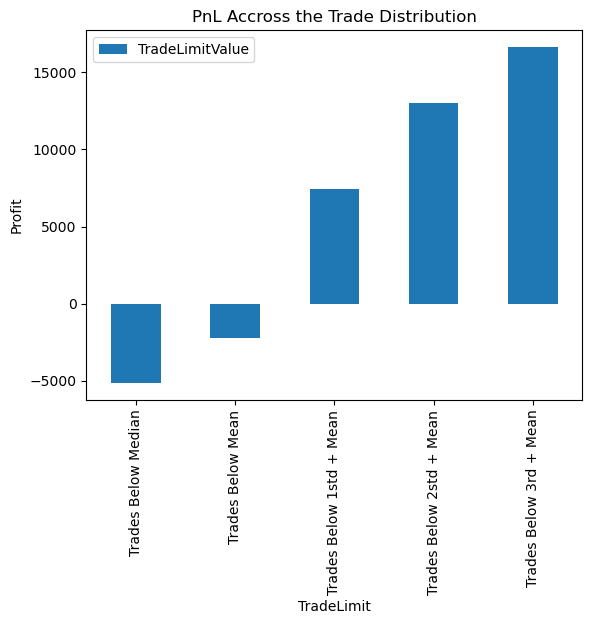

In [81]:

outlierTestGraph = pd.DataFrame({
     'TradeLimitValue': 
    [aProfitMedianSSum[aProfitMedianS].sum(), aProfitMeanSSum[aProfitMeanS].sum(), 
     aProfitOMeanSSum[aProfitOMeanS].sum(), aProfitTMeanSSum[aProfitTMeanS].sum(), aProfitTHMeanSSum[aProfitTHMeanS].sum()],
    'TradeLimit': ['Trades Below Median', 'Trades Below Mean', 'Trades Below 1std + Mean', 
                   'Trades Below 2std + Mean', 'Trades Below 3rd + Mean']
})


outlierTestGraph.plot.bar(y = 'TradeLimitValue', x = 'TradeLimit', title = 'PnL Accross the Trade Distribution', ylabel = 'Profit')

27


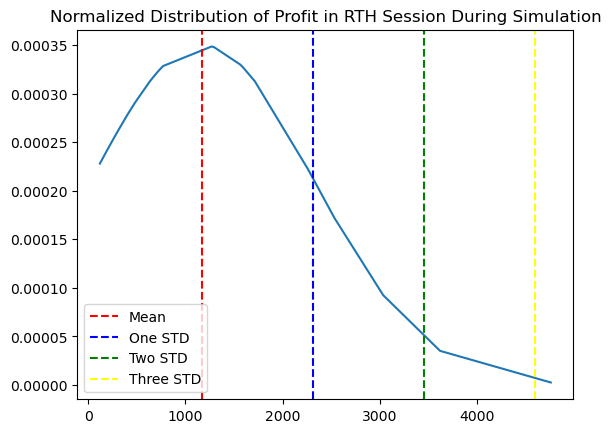

In [82]:
tData_meanSLO = np.mean(tData[test]['BracketNoTP'])
tData_stdSLO = np.std(tData[test]['BracketNoTP'])


pdfO = stats.norm.pdf(tData[test]['BracketNoTP'].sort_values(), tData_meanSLO, tData_stdSLO)


plt.plot(tData[test]['BracketNoTP'].sort_values(), pdfO)
plt.title('Normalized Distribution of Profit in RTH Session During Simulation')
print(tData[test]['BracketNoTP'].sort_values().count())
plt.axvline(np.mean(tData[test]['BracketNoTP']), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(np.mean(tData[test]['BracketNoTP']) + np.std(tData[test]['BracketNoTP']), color = 'blue', linestyle = '--', label = 'One STD')
plt.axvline(np.mean(tData[test]['BracketNoTP']) + (np.std(tData[test]['BracketNoTP']) * 2), color = 'green', linestyle = '--', label = 'Two STD')
plt.axvline(np.mean(tData[test]['BracketNoTP']) + (np.std(tData[test]['BracketNoTP']) * 3), color = 'yellow', linestyle = '--', label = 'Three STD')
plt.legend(loc="lower left")
plt.show()


In [83]:
#Since we normalized our dataset, anything above one std is approximately 15% of all trades, 
#meaning most of our profit (around 12k increase) came from the rest of that 15%, which in terms of consistency, is not 
#beneficial and not a long term trading strategy.